In [1]:
from sklearn.datasets import load_digits
import numpy as np
import pandas as pd

In [2]:
data = load_digits()
X = pd.DataFrame(data['data'], columns=data['feature_names'])
Y = data.target
print(X)
print(Y)

      pixel_0_0  pixel_0_1  pixel_0_2  pixel_0_3  pixel_0_4  pixel_0_5  \
0           0.0        0.0        5.0       13.0        9.0        1.0   
1           0.0        0.0        0.0       12.0       13.0        5.0   
2           0.0        0.0        0.0        4.0       15.0       12.0   
3           0.0        0.0        7.0       15.0       13.0        1.0   
4           0.0        0.0        0.0        1.0       11.0        0.0   
...         ...        ...        ...        ...        ...        ...   
1792        0.0        0.0        4.0       10.0       13.0        6.0   
1793        0.0        0.0        6.0       16.0       13.0       11.0   
1794        0.0        0.0        1.0       11.0       15.0        1.0   
1795        0.0        0.0        2.0       10.0        7.0        0.0   
1796        0.0        0.0       10.0       14.0        8.0        1.0   

      pixel_0_6  pixel_0_7  pixel_1_0  pixel_1_1  ...  pixel_6_6  pixel_6_7  \
0           0.0        0.0      

### Check Data Set

<AxesSubplot:xlabel='count'>

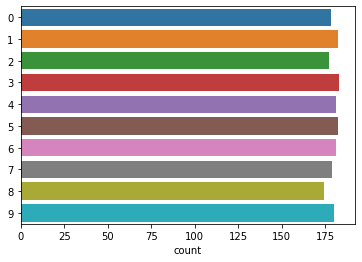

In [3]:
import seaborn as sb
sb.countplot(y=Y, data=X)

## Preprocessing

### Scaled data set

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled)

[[ 0.         -0.33501649 -0.04308102 ... -1.14664746 -0.5056698
  -0.19600752]
 [ 0.         -0.33501649 -1.09493684 ...  0.54856067 -0.5056698
  -0.19600752]
 [ 0.         -0.33501649 -1.09493684 ...  1.56568555  1.6951369
  -0.19600752]
 ...
 [ 0.         -0.33501649 -0.88456568 ... -0.12952258 -0.5056698
  -0.19600752]
 [ 0.         -0.33501649 -0.67419451 ...  0.8876023  -0.5056698
  -0.19600752]
 [ 0.         -0.33501649  1.00877481 ...  0.8876023  -0.26113572
  -0.19600752]]


### Finding Covariance Matrix

In [5]:
features = X_scaled.T
cov_matrix = np.cov(features)
print(cov_matrix)

[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          1.00055679  0.55692803 ... -0.02988686  0.02656195
  -0.04391324]
 [ 0.          0.55692803  1.00055679 ... -0.04120565  0.07263924
   0.08256908]
 ...
 [ 0.         -0.02988686 -0.04120565 ...  1.00055679  0.64868875
   0.26213704]
 [ 0.          0.02656195  0.07263924 ...  0.64868875  1.00055679
   0.62077355]
 [ 0.         -0.04391324  0.08256908 ...  0.26213704  0.62077355
   1.00055679]]


### Finding Eigen Values and Eigen vector

In [6]:
e_values, e_vectors = np.linalg.eig(cov_matrix)
print(e_values.shape)
print(e_values)
print(e_vectors.shape)
print(e_vectors)

(64,)
[7.34477606 5.83549054 5.15396118 3.96623597 2.9663452  2.57204442
 2.40600941 2.06867355 1.82993314 1.78951739 1.69784616 1.57287889
 1.38870781 1.35933609 1.32152536 1.16829176 1.08368678 0.99977862
 0.97438293 0.90891242 0.82271926 0.77631014 0.71155675 0.64552365
 0.59527399 0.5765018  0.52673155 0.5106363  0.48686381 0.45560107
 0.44285155 0.42230086 0.3991063  0.39110111 0.36094517 0.34860306
 0.3195963  0.29406627 0.05037444 0.27692285 0.06328961 0.258273
 0.24783029 0.2423566  0.07635394 0.08246812 0.09018543 0.09840876
 0.10250434 0.11188655 0.11932898 0.12426371 0.13321081 0.14311427
 0.217582   0.15818474 0.16875236 0.20799593 0.17612894 0.2000909
 0.18983516 0.         0.         0.        ]
(64, 64)
[[ 0.          0.          0.         ...  1.          0.
   0.        ]
 [ 0.18223392 -0.04702701  0.02358821 ...  0.          0.
   0.        ]
 [ 0.285868   -0.0595648  -0.05679875 ...  0.          0.
   0.        ]
 ...
 [ 0.103198    0.24261778 -0.02227952 ...  0.   

### Selecting number of features on the basis of contribution (eigen values)

In [7]:
percent_var =[]
for i in range(len(e_values)):
    percent_var.append(e_values[i]/np.sum(e_values))
print(percent_var)

[0.12033916097734897, 0.09561054403097853, 0.08444414892624579, 0.06498407907524172, 0.04860154875966408, 0.04214119869271948, 0.03942082803567393, 0.03389380924638335, 0.029982210116252322, 0.029320025512522115, 0.027818054635503287, 0.025770550925819945, 0.02275303315764249, 0.02227179739514349, 0.021652294318492468, 0.01914166606442125, 0.017755470851681956, 0.01638069274284422, 0.015964601688623403, 0.014891911870878176, 0.0134796956581794, 0.012719313702347568, 0.011658373505919506, 0.010576465985363222, 0.009753159471981104, 0.00944558989731997, 0.00863013826970724, 0.008366428536685129, 0.00797693248411244, 0.007464713709260609, 0.007255821513702744, 0.006919112454811818, 0.006539085355726159, 0.006407925738459852, 0.005913841117223431, 0.005711624052235228, 0.005236368034166363, 0.004818075864451417, 0.0008253509448180289, 0.004537192598584486, 0.001036957301557182, 0.004231627532327793, 0.004060530699790377, 0.003970848082758282, 0.001251007424973019, 0.001351184113370858, 0.0

In [8]:
contribute = 0
for i in range(len(percent_var)):
    contribute += percent_var[i]*100
    print(i, '. ', contribute, " %")


0 .  12.033916097734897  %
1 .  21.59497050083275  %
2 .  30.03938539345733  %
3 .  36.537793300981505  %
4 .  41.397948176947914  %
5 .  45.61206804621986  %
6 .  49.554150849787256  %
7 .  52.943531774425594  %
8 .  55.94175278605083  %
9 .  58.87375533730304  %
10 .  61.655560800853365  %
11 .  64.23261589343537  %
12 .  66.50791920919961  %
13 .  68.73509894871397  %
14 .  70.90032838056321  %
15 .  72.81449498700533  %
16 .  74.59004207217353  %
17 .  76.22811134645795  %
18 .  77.82457151532029  %
19 .  79.3137627024081  %
20 .  80.66173226822603  %
21 .  81.93366363846079  %
22 .  83.09950098905274  %
23 .  84.15714758758907  %
24 .  85.13246353478718  %
25 .  86.07702252451918  %
26 .  86.94003635148991  %
27 .  87.77667920515842  %
28 .  88.57437245356967  %
29 .  89.32084382449573  %
30 .  90.046425975866  %
31 .  90.73833722134718  %
32 .  91.39224575691979  %
33 .  92.03303833076578  %
34 .  92.62442244248813  %
35 .  93.19558484771164  %
36 .  93.71922165112828  %
37 .  94

In [9]:
res = pd.DataFrame()
for i in range(50): #1st 50 features are selected 
    PC = X_scaled.dot(e_vectors.T[i])
    res['PC'+str(i+1)] = PC
res['number'] = Y
print(res)

           PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0    -1.914214  0.954502 -3.946035 -2.028723 -0.267173  0.530327  1.415321   
1    -0.588980 -0.924636  3.924755  1.779850 -0.993430 -0.675652 -1.878565   
2    -1.302039  0.317189  3.023333  2.043376 -2.081155  0.935121  1.296200   
3     3.020770  0.868772 -0.801744  2.187039 -0.556813  0.727124 -0.959766   
4    -4.528949  1.093480  0.973121  1.419510 -1.715106  1.431592 -1.073649   
...        ...       ...       ...       ...       ...       ...       ...   
1792 -0.104331 -0.255024 -3.765861  1.947006 -0.190094 -0.555760 -0.531222   
1793 -2.423234  1.429611 -3.045245 -2.632089 -0.822902  0.004061  1.106872   
1794 -1.022596  0.147911  2.469974  0.620307 -0.972043 -0.007377 -0.381115   
1795 -1.076055  0.380906 -2.455487  1.312013  0.253533 -0.638322 -1.034470   
1796  1.257702  2.227591  0.283628  0.127073 -1.570173  2.342953  0.383075   

           PC8       PC9      PC10  ...      PC42      PC43    